Written by: Konstantinos Perros
AEM : 3713

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The images are 28x28 pixels depicting numbers from 0 to 9, with 60000 total training images and 10000 total testing images.

In [41]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist


In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Depicts the number of images as well as their dimensions

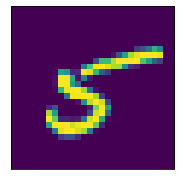

5


In [45]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(3, 3))
plt.imshow(x_train[145])
plt.xticks([])
plt.yticks([])
plt.show()
print(y_train[145])

Depicts and plots a random image from the dataset to validate usage.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import NearestCentroid

Import the KNN and Nearest Centroid calssifiers from the scikit-learn library

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

x_train_knn1 = x_train.reshape(60000, 784)
x_test_knn1 = x_test.reshape(10000, 784)

knn.fit(x_train_knn1, y_train)
print(knn.score(x_test_knn1, y_test))

0.9691


Reshape the data for usage in the classifier for 1 neighbour, run the classifier and present the accuracy after testing with the initial data.

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

x_train_knn3 = x_train.reshape(60000, 784)
x_test_knn3 = x_test.reshape(10000, 784)

knn.fit(x_train_knn3, y_train)
print(knn.score(x_test_knn3, y_test))

0.9705


Reshape the data for usage in the classifier for 3 neighbours, run the classifier and present the accuracy after testing with the initial data.

In [22]:
clf = NearestCentroid()

x_train_clf = x_train.reshape(60000, 784)
x_test_clf = x_test.reshape(10000, 784)
clf.fit(x_train_clf, y_train)
NearestCentroid()
print(clf.score(x_test_clf,y_test))


0.8203


Reshape the data for usage in the classifier for finding the nearest centroids, run the classifier and present the accuracy after testing with the initial data.

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

x_train_knn5 = x_train.reshape(60000, 784)
x_test_knn5 = x_test.reshape(10000, 784)

knn.fit(x_train_knn5, y_train)
print(knn.score(x_test_knn5, y_test))

0.9688


Reshape the data for usage in the classifier for 5 neighbours, run the classifier and present the accuracy after testing with the initial data.

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)

x_train_knn7 = x_train.reshape(60000, 784)
x_test_knn7 = x_test.reshape(10000, 784)

knn.fit(x_train_knn7, y_train)
print(knn.score(x_test_knn7, y_test))

0.9694


Reshape the data for usage in the classifier for 7 neighbours, run the classifier and present the accuracy after testing with the initial data.

In [39]:
from sklearn.decomposition import PCA



Import the Principal Component Analysis library and run on all the above results to increase dimensions, compress data and improve accuracy

In [46]:
pca = PCA(n_components=50)

pca.fit(x_train_knn1)
x_train_pca = pca.transform(x_train_knn1)

pca.fit(x_test_knn1)
x_test_pca = pca.transform(x_test_knn1)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_test_pca, y_test)
print(knn.score(x_test_pca, y_test))

1.0


In [47]:
pca = PCA(n_components=50)

pca.fit(x_train_knn3)
x_train_pca = pca.transform(x_train_knn3)

pca.fit(x_test_knn3)
x_test_pca = pca.transform(x_test_knn3)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_test_pca, y_test)
print(knn.score(x_test_pca, y_test))

0.9807


In [48]:
pca = PCA(n_components=50)

pca.fit(x_train_knn5)
x_train_pca = pca.transform(x_train_knn5)

pca.fit(x_test_knn5)
x_test_pca = pca.transform(x_test_knn5)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_test_pca, y_test)
print(knn.score(x_test_pca, y_test))

0.9751


In [49]:
pca = PCA(n_components=50)

pca.fit(x_train_knn7)
x_train_pca = pca.transform(x_train_knn7)

pca.fit(x_test_knn7)
x_test_pca = pca.transform(x_test_knn7)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_test_pca, y_test)
print(knn.score(x_test_pca, y_test))

0.9701


In [50]:
pca = PCA(n_components=50)

pca.fit(x_train_clf)
x_train_pca = pca.transform(x_train_clf)

pca.fit(x_test_clf)
x_test_pca = pca.transform(x_test_clf)

clf = NearestCentroid()

clf.fit(x_test_pca, y_test)
NearestCentroid()
print(clf.score(x_test_pca,y_test))

0.8213


As shown above, after increasing substantially the dimensions, the accuracies for the classifiers come really close to perfection, while with lower dimensions the accuracies remain unchanged or worsen.